In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('../data/raw/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [39]:
df.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [41]:
binary_cat = ['default', 'housing', 'loan', 'y']
for category in binary_cat:
    df[category] = df[category].map({'yes': 1, 'no': 0})    
df[binary_cat]

,default,housing,loan,y
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [42]:
df.default.value_counts()

default
0    44396
1      815
Name: count, dtype: int64

In [43]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first=True)

In [44]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,True,False,False,True,False,False,True,False,False,True
1,44,0,29,1,0,5,may,151,1,-1,...,False,True,True,False,False,False,True,False,False,True
2,33,0,2,1,1,5,may,76,1,-1,...,True,False,True,False,False,False,True,False,False,True
3,47,0,1506,1,0,5,may,92,1,-1,...,True,False,False,False,True,False,True,False,False,True
4,33,0,1,0,0,5,may,198,1,-1,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,True,False,False,True,False,False,False,False,False,True
45207,71,0,1729,0,0,17,nov,456,2,-1,...,False,False,False,False,False,False,False,False,False,True
45208,72,0,5715,0,0,17,nov,1127,5,184,...,True,False,True,False,False,False,False,False,True,False
45209,57,0,668,0,0,17,nov,508,4,-1,...,True,False,True,False,False,True,False,False,False,True


In [45]:
df['recently_contacted'] = df['pdays'].apply(lambda x: 1 if x >= 0 and x < 30 else 0)

In [46]:
df['day_of_week'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'], format='%d-%b').dt.dayofweek
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

In [47]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,poutcome_other,poutcome_success,poutcome_unknown,recently_contacted,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,58,0,2143,1,0,5,may,261,1,-1,...,False,False,True,0,False,False,False,False,True,False
1,44,0,29,1,0,5,may,151,1,-1,...,False,False,True,0,False,False,False,False,True,False
2,33,0,2,1,1,5,may,76,1,-1,...,False,False,True,0,False,False,False,False,True,False
3,47,0,1506,1,0,5,may,92,1,-1,...,False,False,True,0,False,False,False,False,True,False
4,33,0,1,0,0,5,may,198,1,-1,...,False,False,True,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,False,False,True,0,False,False,False,False,True,False
45207,71,0,1729,0,0,17,nov,456,2,-1,...,False,False,True,0,False,False,False,False,True,False
45208,72,0,5715,0,0,17,nov,1127,5,184,...,False,True,False,0,False,False,False,False,True,False
45209,57,0,668,0,0,17,nov,508,4,-1,...,False,False,True,0,False,False,False,False,True,False


In [48]:
scaler = StandardScaler()
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [49]:
df

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,poutcome_other,poutcome_success,poutcome_unknown,recently_contacted,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1.606965,0,0.256419,1,0,5,may,0.011016,-0.569351,-0.411453,...,False,False,True,0,False,False,False,False,True,False
1,0.288529,0,-0.437895,1,0,5,may,-0.416127,-0.569351,-0.411453,...,False,False,True,0,False,False,False,False,True,False
2,-0.747384,0,-0.446762,1,1,5,may,-0.707361,-0.569351,-0.411453,...,False,False,True,0,False,False,False,False,True,False
3,0.571051,0,0.047205,1,0,5,may,-0.645231,-0.569351,-0.411453,...,False,False,True,0,False,False,False,False,True,False
4,-0.747384,0,-0.447091,0,0,5,may,-0.233620,-0.569351,-0.411453,...,False,False,True,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0,-0.176460,0,0,17,nov,2.791329,0.076230,-0.411453,...,False,False,True,0,False,False,False,False,True,False
45207,2.831227,0,0.120447,0,0,17,nov,0.768224,-0.246560,-0.411453,...,False,False,True,0,False,False,False,False,True,False
45208,2.925401,0,1.429593,0,0,17,nov,3.373797,0.721811,1.436189,...,False,True,False,0,False,False,False,False,True,False
45209,1.512791,0,-0.228024,0,0,17,nov,0.970146,0.399020,-0.411453,...,False,False,True,0,False,False,False,False,True,False


In [50]:
df.drop(['day','month'], axis = 1, inplace=True)
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,poutcome_other,poutcome_success,poutcome_unknown,recently_contacted,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1.606965,0,0.256419,1,0,0.011016,-0.569351,-0.411453,-0.251940,0,...,False,False,True,0,False,False,False,False,True,False
1,0.288529,0,-0.437895,1,0,-0.416127,-0.569351,-0.411453,-0.251940,0,...,False,False,True,0,False,False,False,False,True,False
2,-0.747384,0,-0.446762,1,1,-0.707361,-0.569351,-0.411453,-0.251940,0,...,False,False,True,0,False,False,False,False,True,False
3,0.571051,0,0.047205,1,0,-0.645231,-0.569351,-0.411453,-0.251940,0,...,False,False,True,0,False,False,False,False,True,False
4,-0.747384,0,-0.447091,0,0,-0.233620,-0.569351,-0.411453,-0.251940,0,...,False,False,True,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0,-0.176460,0,0,2.791329,0.076230,-0.411453,-0.251940,1,...,False,False,True,0,False,False,False,False,True,False
45207,2.831227,0,0.120447,0,0,0.768224,-0.246560,-0.411453,-0.251940,1,...,False,False,True,0,False,False,False,False,True,False
45208,2.925401,0,1.429593,0,0,3.373797,0.721811,1.436189,1.050473,1,...,False,True,False,0,False,False,False,False,True,False
45209,1.512791,0,-0.228024,0,0,0.970146,0.399020,-0.411453,-0.251940,0,...,False,False,True,0,False,False,False,False,True,False


In [51]:
X = df.drop(['y'],axis=1)
y = df['y']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [53]:
log_model = GridSearchCV(LogisticRegression(), 
                     {'penalty': ['l1','l2', 'elasticnet'], 
                      'C': [1,2,5,10]}, 
                     cv = 10, 
                     scoring='accuracy')

In [54]:
log_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [55]:
log_model.best_params_

{'C': 1, 'penalty': 'l2'}

In [56]:
pred_log = log_model.predict(X_test)

In [57]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.65      0.32      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.89      9043



In [58]:
with open('../models/log_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)

In [59]:
log_accuracy = accuracy_score(y_test, pred_log)
log_auc = roc_auc_score(y_test, pred_log)
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"Logistic Regression AUC: {log_auc:.4f}")

Logistic Regression Accuracy: 0.9006
Logistic Regression AUC: 0.6485


In [60]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.36      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [61]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest AUC: {rf_auc:.4f}")

Random Forest Accuracy: 0.9022
Random Forest AUC: 0.6663


In [62]:
with open('../models/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [63]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.62      0.39      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



In [64]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"Gradient Boosting AUC: {gb_auc:.4f}")

Gradient Boosting Accuracy: 0.9011
Gradient Boosting AUC: 0.6788


In [65]:
models = ['Tuned Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = [log_accuracy, rf_accuracy, gb_accuracy]
auc_scores = [log_auc, rf_auc, gb_auc]

In [66]:
with open('../models/gb_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

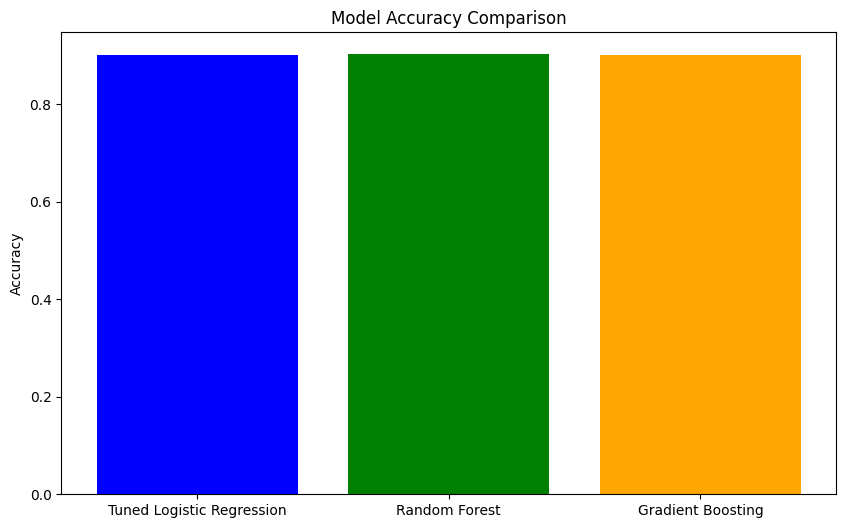

In [67]:
# Plotting the comparison
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


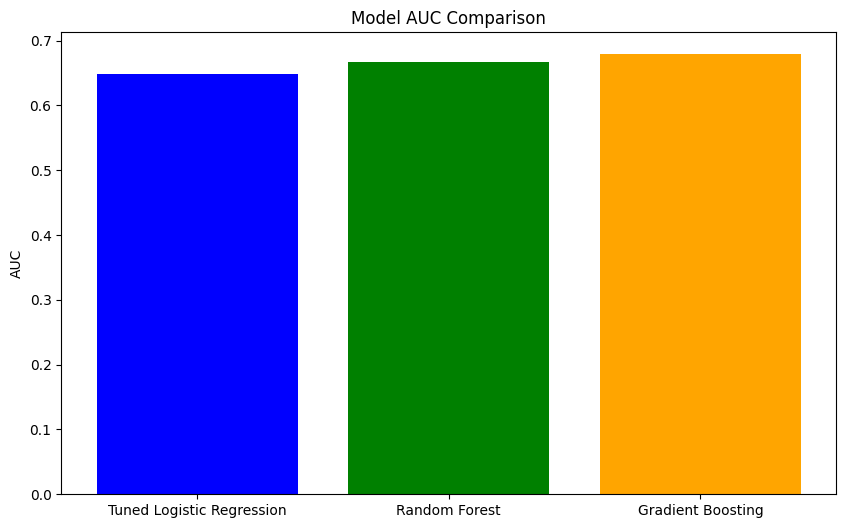

In [68]:
plt.figure(figsize=(10,6))
plt.bar(models, auc_scores, color=['blue', 'green', 'orange'])
plt.title('Model AUC Comparison')
plt.ylabel('AUC')
plt.show()